# 1. Import and Install Dependencies

In [5]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\ut16t\AppData\Roaming\Python\Python311\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ut16t\AppData\Roaming\Python\Python311\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ut16t\AppData\Roaming\Python\Python311\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\ut16t\AppData\Roaming\Python\Python311\site-pac

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.6.0


# 2. Keypoints using MP Holistic

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [13]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [15]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [17]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [21]:
draw_landmarks(frame, results)

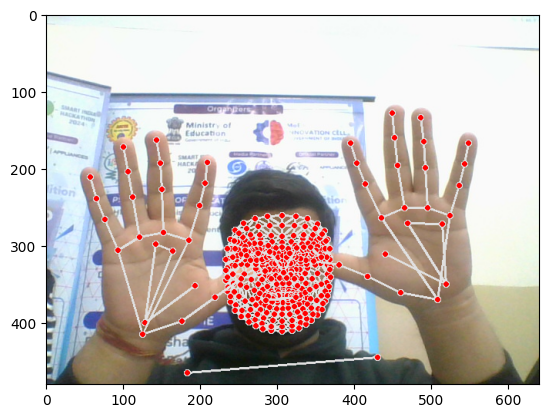

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [22]:
# def mediapipe_detection(image, model):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
#     image.flags.writeable = False                   # Image is no longer writeable
#     results = model.process(image)                  # Make prediction
#     image.flags.writeable = True                    # Image is now writeable 
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
#     return image, results

# def draw_landmarks(image, results):
#     if results.face_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION
#         )  # Draw face connections

#     if results.pose_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
#         )  # Draw pose connections

#     if results.left_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
#         )  # Draw left hand connections

#     if results.right_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
#         )  # Draw right hand connections

# def draw_styled_landmarks(image, results):
#     if results.face_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
#             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
#             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
#         )

#     if results.pose_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
#             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
#         )

#     if results.left_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
#             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
#         )

#     if results.right_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
#             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
#         )

# # To avoid the NoneType error
# if results.left_hand_landmarks:
#     print(len(results.left_hand_landmarks.landmark))
# else:
#     print("Left hand landmarks not detected.")

In [25]:
len(results.left_hand_landmarks.landmark)

21

In [27]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [29]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [31]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [33]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [35]:
result_test = extract_keypoints(results)

In [37]:
result_test

array([ 0.48128924,  0.69853705, -1.05860853, ...,  0.08922285,
        0.4414947 , -0.09816165])

In [39]:
np.save('0', result_test)

In [41]:
np.load('0.npy')

array([ 0.48128924,  0.69853705, -1.05860853, ...,  0.08922285,
        0.4414947 , -0.09816165])

# 4. Setup Folders for Collection

In [44]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [46]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [3]:
print("hi")

hi


# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [49]:
label_map = {label:num for num, label in enumerate(actions)}

In [52]:
label_map

{'hello': 0, 'thanks': 1, 'help': 2}

In [54]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "0.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [55]:
np.array(sequences).shape

(90, 30, 1662)

In [58]:
np.array(labels).shape

(90,)

In [60]:
X = np.array(sequences)

In [62]:
X.shape

(90, 30, 1662)

In [64]:
y = to_categorical(labels).astype(int)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [68]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [73]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [75]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\ut16t\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [79]:
print(actions.shape[0])

3


In [81]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - categorical_accuracy: 0.3523 - loss: 4.2433
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.4345 - loss: 22.6628
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3933 - loss: 11.6371
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.2447 - loss: 25.1674
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3503 - loss: 4.1798
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.2760 - loss: 1.3230
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3033 - loss: 1.0848
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4501 - loss: 1.1153
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.5205 - loss: 0.9276
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.6869 - loss: 0.7611
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━

In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [86]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [87]:
actions[np.argmax(res[4])]

'help'

In [90]:
actions[np.argmax(y_test[4])]

'help'

# 9. Save Weights

In [93]:
model.save('action.h5')

In [95]:
model.load_weights('action.h5')

In [97]:
# Save the model in .keras format
model.save('action_model.keras', save_format='keras')

In [102]:
import tensorflow as tf

# Load your existing Keras model
model = tf.keras.models.load_model('action.h5')

# Create the converter and enable experimental flags
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True  # Enable resource variables
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Use TFLite's built-in operations
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow TensorFlow operations if needed
]
converter._experimental_lower_tensor_list_ops = False  # Prevent lowering TensorList ops

# Convert the model to TFLite format
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('mymodel.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as mymodel.tflite")

INFO:tensorflow:Assets written to: C:\Users\ut16t\AppData\Local\Temp\tmpfty1a8ow\assets


INFO:tensorflow:Assets written to: C:\Users\ut16t\AppData\Local\Temp\tmpfty1a8ow\assets


Saved artifact at 'C:\Users\ut16t\AppData\Local\Temp\tmpfty1a8ow'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 1662), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2304696278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696279952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696279568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696281104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696280912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696278608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696283408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696283600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696280720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304696283792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  230469628

In [104]:
# Print the model summary
model.summary()

# Check the input shape
print("Input shape:", model.input_shape)

# Check the output shape
print("Output shape:", model.output_shape)

# Check the number of classes
num_classes = model.layers[-1].output_shape[-1]
print("Number of classes:", num_classes)

# Predict on dummy data to see output type
import numpy as np
dummy_input = np.random.rand(1, 30, 1662)  # Batch size = 1
dummy_output = model.predict(dummy_input)
print("Dummy output:", dummy_output)
print("Output type:", type(dummy_output))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 596,677 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Input shape: (None, 30, 1662)
Output shape: (None, 3)


AttributeError: 'Dense' object has no attribute 'output_shape'

In [106]:
# Get the last layer of the model
last_layer = model.layers[-1]

# Check the number of classes (number of neurons in the last Dense layer)
num_classes = last_layer.units  # 'units' gives the number of neurons in the Dense layer
print("Number of classes:", num_classes)

# Check output type by predicting on dummy data
dummy_input = np.random.random((1, 30, 1662))  # Replace with valid shape for your model
dummy_output = model.predict(dummy_input)

print("Output shape:", dummy_output.shape)
print("Output type:", dummy_output)

Number of classes: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Output shape: (1, 3)
Output type: [[8.9022166e-08 1.1235709e-05 9.9998868e-01]]


# 10. Evaluation using Confusion Matrix and Accuracy

In [99]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [101]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [103]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [105]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [107]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [110]:
from scipy import stats

In [112]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [1]:
# Ensure res and actions have the same length
# Add a check before visualization
if len(res) != len(actions):
    print(f"Length mismatch: res has {len(res)} elements, actions has {len(actions)} elements")
    # You might need to pad or truncate one of the lists

NameError: name 'res' is not defined

In [114]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [164]:
!pip install pyttsx3

# Sign to speech

In [116]:
import pyttsx3

In [144]:
# Initialize the TTS engine
engine = pyttsx3.init()

# Optional: Set properties for the voice
engine.setProperty('rate', 150)  # Speed of speech
engine.setProperty('volume', 1.0)  # Volume (0.0 to 1.0)

# Real-Time Test with Speech
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    predicted_action = actions[np.argmax(res)]
                    if len(sentence) > 0:
                        if predicted_action != sentence[-1]:
                            sentence.append(predicted_action)
                            # Speak the predicted word
                            engine.say(predicted_action)
                            engine.runAndWait()
                    else:
                        sentence.append(predicted_action)
                        # Speak the predicted word
                        engine.say(predicted_action)
                        engine.runAndWait()

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [178]:
!pip install googletrans==4.0.0-rc1 gtts

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 22.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17457 sha256=e1c3169ae356a31790c7beea2db8b6a435eeb7d6289aa55d2b51230230d4e8e1
  Stored in directory: c:\users\ut16t\appdata\local\pip\cache\wheels\39\17\6f\66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [146]:
import cv2
import os
from gtts import gTTS
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Function to translate text to Hindi
def translate_to_hindi(text):
    translated = translator.translate(text, src='en', dest='hi')
    return translated.text

# Function to speak text in Hindi using gTTS
def speak_text(text):
    tts = gTTS(text, lang='hi')
    tts.save("output.mp3")
    os.system("start output.mp3")  # Use 'start' for Windows, 'xdg-open' for Linux, or 'open' for macOS

# Initialize variables for real-time prediction
cap = cv2.VideoCapture(0)
sentence = []
sequence = []
predictions = []
threshold = 0.5
predicted_action = ""

# Mediapipe setup (if using Mediapipe for pose detection)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for smoother processing
        frame = cv2.resize(frame, (640, 480))

        # Make detections (replace with your mediapipe detection function)
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks (replace with your drawing function)
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # Update predicted action if conditions are met
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    new_action = actions[np.argmax(res)]
                    if new_action != predicted_action:
                        predicted_action = new_action

                        # Translate and Speak in Hindi
                        hindi_text = translate_to_hindi(predicted_action)
                        print(f"Predicted: {predicted_action}, Translated: {hindi_text}")
                        speak_text(hindi_text)

                        # Update sentence for display
                        if len(sentence) > 5:
                            sentence = sentence[-5:]
                        sentence.append(predicted_action)

        # Display the English prediction text on the screen
        for i, text in enumerate(sentence):
            cv2.putText(image, text, (10, 50 + i * 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Show the video feed
        cv2.imshow('Real-Time Prediction', image)

        # Break the loop gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

AttributeError: 'ellipsis' object has no attribute 'predict'